In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
from pathlib import Path
from env import host, user, password
import seaborn as sns

def get_db_url(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file 
    to create a connection url to access the codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

################################################### Acquire #########################################################
# use this function the 1st time to get initial dataset.
def new_zillow_data():
    '''This function reads in zillow data from Codeup database.'''
    sql_query = '''    
    SELECT properties_2017.fips,
        properties_2017.bedroomcnt,
        properties_2017.bathroomcnt,
        properties_2017.calculatedfinishedsquarefeet,
        properties_2017.taxvaluedollarcnt
        FROM predictions_2017
        JOIN properties_2017
        ON predictions_2017.parcelid = properties_2017.parcelid
        JOIN propertylandusetype
        ON properties_2017.propertylandusetypeid = propertylandusetype.propertylandusetypeid
        WHERE propertylandusetype.propertylandusetypeid = '261'
        AND predictions_2017.transactiondate between '2017-01-01' AND '2017-12-31';'''

    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_db_url('zillow'))
    return df



In [2]:
df=new_zillow_data()

In [3]:
df.head()

,fips,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,6059.0,4.0,3.5,3100.0,1023282.0
1,6111.0,2.0,1.0,1465.0,464000.0
2,6059.0,3.0,2.0,1243.0,564778.0
3,6037.0,4.0,3.0,2376.0,145143.0
4,6037.0,4.0,3.0,2962.0,773303.0


In [4]:
#Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.
df = df.replace(r'^\s*$', np.nan, regex=True)
    
  

In [5]:
#Drop all rows with any Null values, assign to df, and verify with df.info().
df = df.dropna()
    
    


In [6]:
#rename the columns so they are human readable
df=df.rename(columns={"bedroomcnt":"bedrooms","bathroomcnt":"bathrooms",
                          "calculatedfinishedsquarefeet":"squarefeet", 
                          "taxvaluedollarcnt": "home_value",})

In [7]:
df.head()

,fips,bedrooms,bathrooms,squarefeet,home_value
0,6059.0,4.0,3.5,3100.0,1023282.0
1,6111.0,2.0,1.0,1465.0,464000.0
2,6059.0,3.0,2.0,1243.0,564778.0
3,6037.0,4.0,3.0,2376.0,145143.0
4,6037.0,4.0,3.0,2962.0,773303.0


In [13]:
df.describe()

,fips,bedrooms,bathrooms,squarefeet,home_value
count,52358.000000,52358.000000,52358.000000,52358.000000,5.235800e+04
mean,6049.111158,3.305531,2.302781,1922.904618,5.280258e+05
std,21.019623,0.941429,1.019773,1004.370420,7.483295e+05
min,6037.000000,0.000000,0.000000,128.000000,1.000000e+03
25%,6037.000000,3.000000,2.000000,1268.000000,1.936442e+05
50%,6037.000000,3.000000,2.000000,1659.000000,3.733765e+05
75%,6059.000000,4.000000,3.000000,2306.000000,6.185332e+05
max,6111.000000,14.000000,18.000000,21929.000000,4.906124e+07


In [14]:
df.home_value.round()

0        1023282.0
1         464000.0
2         564778.0
3         145143.0
4         773303.0
           ...    
52436     346534.0
52437     354621.0
52438      67205.0
52439      49546.0
52440     522000.0
Name: home_value, Length: 52358, dtype: float64

In [18]:
df.home_value.describe().round()

count       52358.0
mean       528026.0
std        748329.0
min          1000.0
25%        193644.0
50%        373376.0
75%        618533.0
max      49061236.0
Name: home_value, dtype: float64

<AxesSubplot:xlabel='bedrooms'>

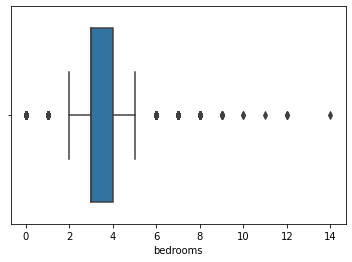

In [9]:
sns.boxplot(x=df["bedrooms"])

<AxesSubplot:xlabel='bathrooms'>

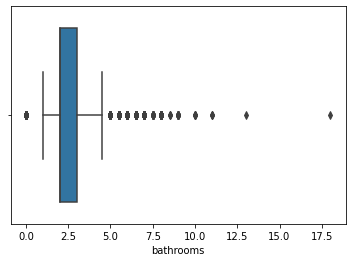

In [10]:
sns.boxplot(x=df["bathrooms"])

<AxesSubplot:xlabel='squarefeet'>

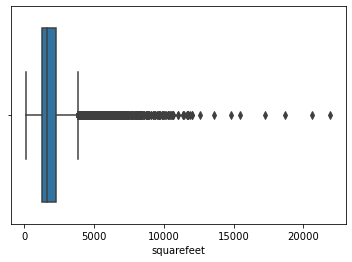

In [11]:
sns.boxplot(x=df["squarefeet"])

<AxesSubplot:xlabel='home_value'>

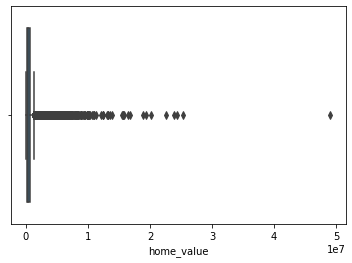

In [20]:
sns.boxplot(x=df["home_value"].round())

In [ ]:
################################################### IMPORT #########################################################
# importing of all needed libraries and modules.  
import wrangle as w
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import os
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train, validate, test=w.wrangle_zillow()

In [ ]:
train.head()

In [ ]:
train